<a href="https://colab.research.google.com/github/vikasbda21/Deep-Learning/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Graduate Admission Prediction using ANN**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import tensorflow
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Admission_Predict_Ver1.1.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.drop(columns=['Serial No.'], inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [12]:
df.duplicated().sum()

0

In [13]:
# Independent & Dependent columns
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [35]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [36]:
# Scale the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

**Model**

In [38]:
model = Sequential()

model.add(Dense(7,activation='relu', input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 17ms/step - loss: 0.4492 - val_loss: 0.4559
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3919 - val_loss: 0.3960
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3376 - val_loss: 0.3392
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2870 - val_loss: 0.2860
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2399 - val_loss: 0.2370
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1960 - val_loss: 0.1927
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1571 - val_loss: 0.1525
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1223 - val_loss: 0.1168
Epoch 9/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0918 - val_loss: 0.0863
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0672 - val_loss: 0.0608
Epoch 11

In [42]:
y_pred = model.predict(X_test_scaled)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8223559840471681

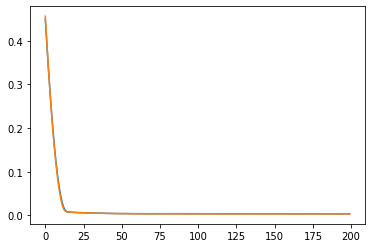

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
import pandas as pd
# history_frame = pd.DataFrame(history.history)
#history_frame.loc[:, ['loss', 'val_loss']].plot()
#history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();